Now we explore the labevents table.

Let's start with some imports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [2]:
labevents_df = pd.read_csv('../Extracted CSVs/LABEVENTS.csv')

Getting a feel of the data.

In [3]:
labevents_df.head()


,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal


In [4]:
labevents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27854055 entries, 0 to 27854054
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ROW_ID      int64  
 1   SUBJECT_ID  int64  
 2   HADM_ID     float64
 3   ITEMID      int64  
 4   CHARTTIME   object 
 5   VALUE       object 
 6   VALUENUM    float64
 7   VALUEUOM    object 
 8   FLAG        object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.9+ GB


In [5]:
labevents_df['FLAG'].value_counts()

abnormal    9779594
delta         64572
Name: FLAG, dtype: int64

This tells us how many of the events have been flagged as abnormal and how many have been flagged as delta.

([<matplotlib.patches.Wedge at 0x219873ab4c0>,
 [Text(-1.099766450213081, 0.02266616389508212, 'abnormal'),
  Text(1.0997664492514767, -0.022666210552260656, 'delta')])

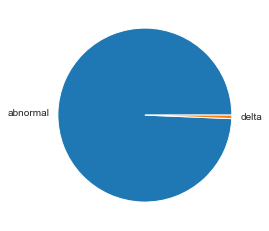

In [6]:
plt.pie(labevents_df['FLAG'].value_counts(), labels= 'abnormal delta'.split())

In [7]:
microbioevents_df = pd.read_csv('../Extracted CSVs/MICROBIOLOGYEVENTS.csv')

In [8]:
microbioevents_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
microbioevents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631726 entries, 0 to 631725
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ROW_ID               631726 non-null  int64  
 1   SUBJECT_ID           631726 non-null  int64  
 2   HADM_ID              631726 non-null  int64  
 3   CHARTDATE            631726 non-null  object 
 4   CHARTTIME            589954 non-null  object 
 5   SPEC_ITEMID          631647 non-null  float64
 6   SPEC_TYPE_DESC       631726 non-null  object 
 7   ORG_ITEMID           326881 non-null  float64
 8   ORG_NAME             328016 non-null  object 
 9   ISOLATE_NUM          328016 non-null  float64
 10  AB_ITEMID            275834 non-null  float64
 11  AB_NAME              275834 non-null  object 
 12  DILUTION_TEXT        267350 non-null  object 
 13  DILUTION_COMPARISON  267178 non-null  object 
 14  DILUTION_VALUE       267178 non-null  float64
 15  INTERPRETATION   

In [10]:
microbioevents_df['SPEC_TYPE_DESC'].value_counts()


BLOOD CULTURE                         179930
URINE                                 140671
SPUTUM                                 99887
SWAB                                   37895
MRSA SCREEN                            32280
                                       ...  
Influenza A/B by DFA - Bronch Wash         1
POST-MORTEM VIRAL CULTURE                  1
C, E, & A Screening                        1
TRANSTRACHEAL ASPIRATE                     1
BLOOD BAG FLUID                            1
Name: SPEC_TYPE_DESC, Length: 87, dtype: int64

This tells us the types of specimens that were analysed in the lab.

In [11]:
microbioevents_df['ORG_NAME'].value_counts()

STAPH AUREUS COAG +                           63947
ESCHERICHIA COLI                              60133
STAPHYLOCOCCUS, COAGULASE NEGATIVE            32777
KLEBSIELLA PNEUMONIAE                         30628
PSEUDOMONAS AERUGINOSA                        28926
                                              ...  
GEOTRICHUM CAPITATUM                              1
BEAUVERIA BASSIANA                                1
ENTAMOEBA HARTMANNI                               1
MALASSEZIA SPECIES                                1
CORYNEBACTERIUM JEIKEIUM (C.D.C. GROUP JK)        1
Name: ORG_NAME, Length: 362, dtype: int64

This tells us the types of organism that were found in the specimens.

In [12]:
microbioevents_df['ORG_NAME'].value_counts().head(10)

STAPH AUREUS COAG +                   63947
ESCHERICHIA COLI                      60133
STAPHYLOCOCCUS, COAGULASE NEGATIVE    32777
KLEBSIELLA PNEUMONIAE                 30628
PSEUDOMONAS AERUGINOSA                28926
ENTEROCOCCUS SP.                      16429
YEAST                                 14182
PROTEUS MIRABILIS                      9605
ENTEROBACTER CLOACAE                   8709
SERRATIA MARCESCENS                    6054
Name: ORG_NAME, dtype: int64

<AxesSubplot:>

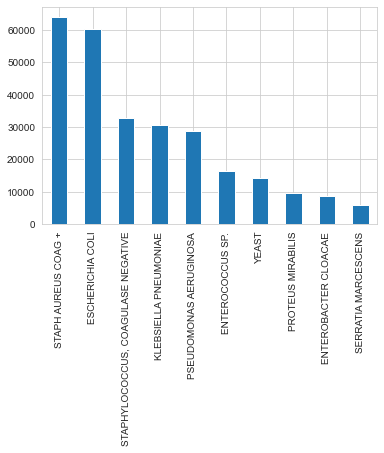

In [13]:
microbioevents_df['ORG_NAME'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

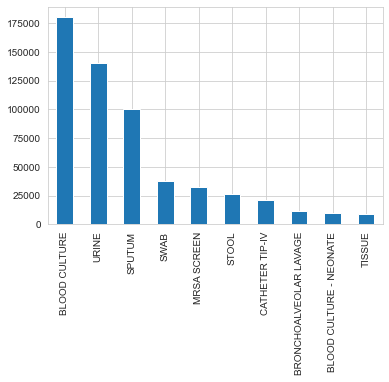

In [14]:
microbioevents_df['SPEC_TYPE_DESC'].value_counts().head(10).plot(kind='bar')

Now let's take a look at how the results were interpreted.

In [15]:
microbioevents_df['INTERPRETATION'].value_counts()

S    188635
R     77169
I     10023
P         7
Name: INTERPRETATION, dtype: int64

([<matplotlib.patches.Wedge at 0x219875e19d0>,
 [Text(-0.6006616658625031, 0.9215235011454036, 'S'),
  Text(0.4917042390608012, -0.9839852342843559, 'R'),
  Text(1.0928203616240004, -0.12547373119497673, 'I'),
  Text(1.0999999964942964, -8.782111458073245e-05, 'P')])

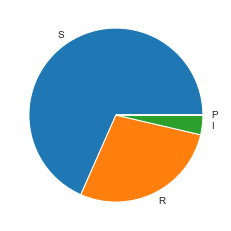

In [16]:
plt.pie(microbioevents_df['INTERPRETATION'].value_counts(), labels = list('SRIP'))

“S” is sensitive, “R” is resistant, “I” is intermediate, and “P” is pending.